# Exploração de dados de aceitação de tecnologia

In [3]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100)
% matplotlib inline

aceitacao_df = pd.read_csv("dataset.csv")

## Dataset de aceitação de tecnologia

Cada variável coletada (Prazer_1, Prazer_2, ...) pode possui valores inteiros de 1 a 5 obtidos através de uma escala de Likert. Uma descrição mais detalhada do dataset é apresentada no arquivo _descricao.md

In [4]:
aceitacao_df.head()

,ID,Idade,Sexo,InstEnsi,Jogou,Console,TDeUso,Prazer_1,Prazer_2,Prazer_3,Prazer_4,Prazer_5,Prazer_6,Prazer_7,Prazer_8,Facil_1,Facil_2,Facil_3,Facil_4,Facil_5,Facil_6,Utilid_1,Utilid_2,Utilid_3,Utilid_4,Desejo_1,Desejo_2,Desejo_3,Desejo_4,Intens_1,Intens_2,Intens_3,UsoAt_1,UsoAt_2,UsoLik_1,UsoLik_2
0,1,21,1,1,2,0,6.0,4,3,4,3,4,4,4,3,5,2,3,3,3,2,3,4,3,4,2,3,4,3,2,4,4,7,0,4,1
1,2,19,1,1,3,0,1.0,5,5,3,4,5,5,5,5,1,4,5,5,5,5,5,5,4,4,4,4,4,5,5,1,3,3,15,3,3
2,3,22,1,0,2,0,6.0,4,2,1,1,4,4,5,5,1,3,3,3,5,5,1,4,5,3,1,1,1,1,1,1,1,0,0,1,1
3,4,21,0,1,1,0,3.0,5,5,5,3,2,1,3,3,1,1,1,5,5,4,1,1,1,1,5,5,1,3,5,5,3,3,15,3,3
4,5,25,1,1,1,0,10.0,4,4,3,2,3,3,4,3,3,3,4,3,3,4,3,3,4,3,3,3,3,2,3,4,2,1,0,2,1


## Distribuição das variáveis que descrevem o perfil da amostra

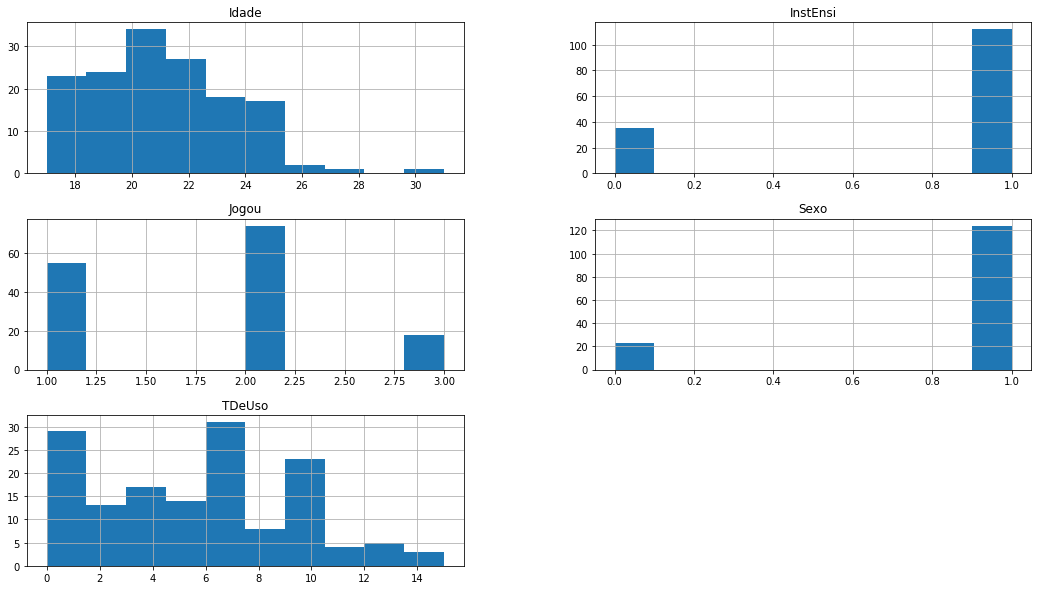

In [15]:
graph = aceitacao_df[["Idade", "Sexo", "InstEnsi", "Jogou", "TDeUso"]].hist(figsize=(18, 10))

### Distribuição do público masculino

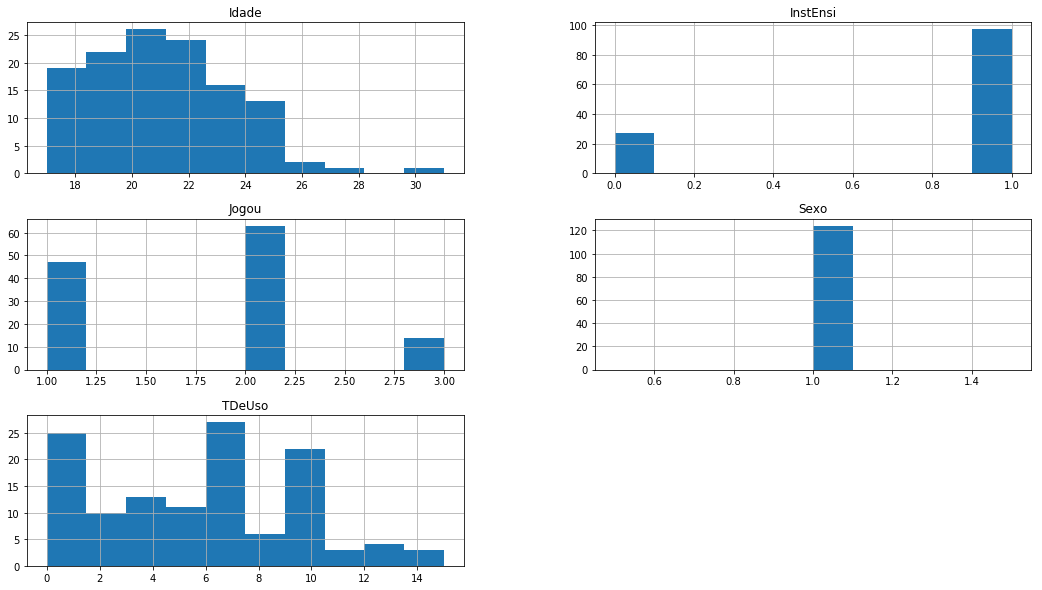

In [14]:
graph = aceitacao_df[["Idade", "Sexo", "InstEnsi", "Jogou", "TDeUso"]][aceitacao_df["Sexo"] == 1].hist(figsize=(18, 10))

### Distribuição do público feminino

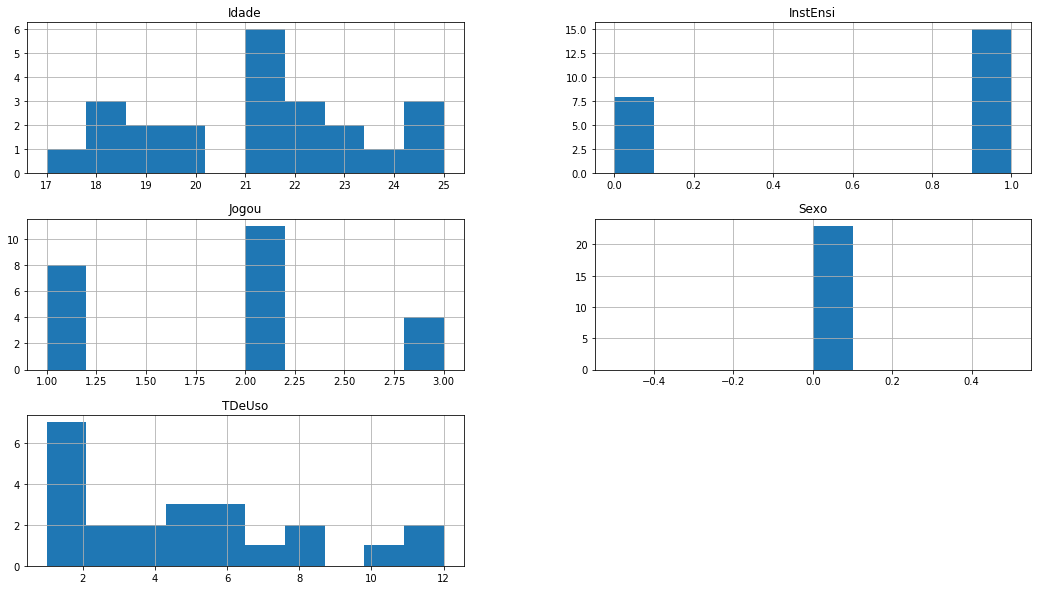

In [13]:
graph = aceitacao_df[["Idade", "Sexo", "InstEnsi", "Jogou", "TDeUso"]][aceitacao_df["Sexo"] == 0].hist(figsize=(18, 10))

# É possível prever o uso através das outras informações do questionário?

As variáveis que informam o uso são UsoLik_1 e UsoLik_2. 

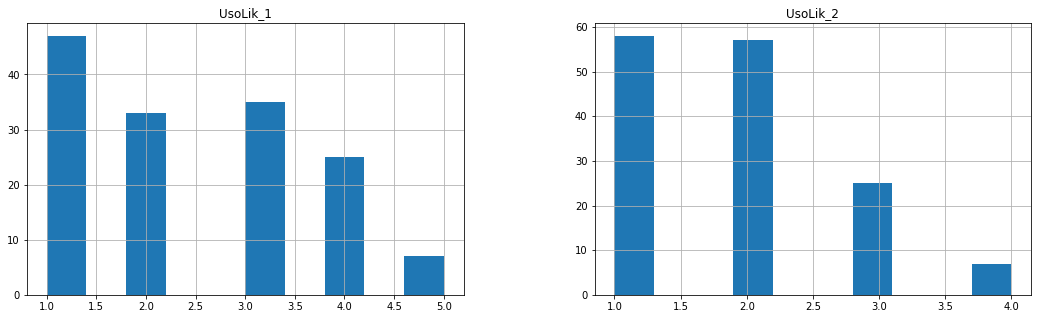

In [22]:
graph = aceitacao_df[["UsoLik_1", "UsoLik_2"]].hist(figsize=(18, 5))

### Utilizando os algoritmo SVM e RandomForest para classificação

O código abaixo realiza uma busca em grid nos parâmetros dos modelos com a finalidade de encontrar o melhor modelo que se ajusta ao conjunto de dados. Para cada modelo testado utiliza-se a validação cruzada com 5 folds. As métricas de avaliação computadas são precision, recall e f1-score.

In [65]:
import warnings
warnings.filterwarnings('ignore')

from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

print(__doc__)


def runModel(X, y, model = "RandomForest"):
    n_samples = len(y)

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Set the parameters by cross-validation
    svm_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    rfo_params  = {"max_depth": [3, None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

    svm_clf = SVC()

    rfo_clf = RandomForestClassifier(n_estimators=20)

    if(model == "RandomForest"): _clf, tuned_parameters = rfo_clf, rfo_params
    else: _clf, tuned_parameters = svm_clf, svm_params

    scores = ['precision']#, 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(_clf, tuned_parameters, cv=5, scoring='%s_macro' % score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        #print("Grid scores on development set:")
        #print()

        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']

        #for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        #    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        #print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()

    # Note the problem is too easy: the hyperparameter plateau is too flat and the
    # output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment


## Preparação do dataset

In [66]:
X = aceitacao_df[["Idade",        "Sexo", "Prazer_1", "Prazer_2", "Prazer_3", "Prazer_4", "Prazer_5", "Prazer_6", 
                  "Prazer_7", "Prazer_8", "Facil_1",  "Facil_2",  "Facil_3",  "Facil_4",  "Facil_5",  "Facil_6", 
                  "Utilid_1", "Utilid_2", "Utilid_3", "Utilid_4", "Desejo_1", "Desejo_2", "Desejo_3", "Desejo_4", 
                  "Intens_1", "Intens_2", "Intens_3"]].values

In [68]:
y = aceitacao_df["UsoLik_1"].values
runModel(X,y,"RandomForest")

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.33      0.91      0.49        11
          2       0.50      0.23      0.32        13
          3       0.20      0.10      0.13        10
          4       0.25      0.14      0.18         7
          5       0.00      0.00      0.00         4

avg / total       0.31      0.33      0.27        45




In [70]:
y = aceitacao_df["UsoLik_2"].values
runModel(X,y,"RandomForest")

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.39      0.93      0.55        14
          2       0.43      0.14      0.21        22
          3       0.20      0.17      0.18         6
          4       0.00      0.00      0.00         3

avg / total       0.36      0.38      0.30        45




A partir do resultado obtido pouco pode se dizer sobre a explicação da variável UsoLik_1 a partir das demais, entretando a quantidade de dados é muito baixa para um problema multiclasse com alta dimensionalidade. A fim de amenizar este problema, existe a possibilidade de tratá-lo como um **problema binário**. Uma vez que a variável de saída é uma escala de uso, pode-se dividir de forma que uma classe represente grupo cuja **frequência não chega a ser semanal** e a segunda classe represente o grupo que joga **pelo menos uma vez por semana**.

In [75]:
y = aceitacao_df["UsoLik_1"].apply(lambda x: 1 if x < 2 else 2).values
runModel(X,y,"RandomForest")

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.78      0.64      0.70        11
          2       0.89      0.94      0.91        34

avg / total       0.86      0.87      0.86        45




Neste segundo caso, é possível observar um indício de relação de causalidade. 